In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### IFSC Code:

Every bank branch operating in the country is identified by its own unique IFSC code. 

* The first four characters are alphabets and tell the name of the bank. They remain the same for every bank branch.

* The fifth character is zero.

* The last 6 characters represent the bank branch and they are usually numeric. 

The code is assigned by the Reserve Bank of India. Any transfer system that’s regulated by the RBI will require the use of an IFSC code.

In [2]:
df = pd.read_csv('/home/yaggi/Desktop/dumps/bank_statement_dump.csv')
df

,uuid,application_id,account_number,password,bank,ifsc,file_id,status,reject_reason,statement_from,...,has_password,request_id,id,bank_statement_id,date,details,amount,balance,lender,created_at.1
0,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,0.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN,2019-08-15T22:53:47.792737+05:30
1,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,1.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN,2019-08-15T22:53:47.792737+05:30
2,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,2.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN,2019-08-15T22:53:47.792737+05:30
3,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,3.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN,2019-08-15T22:53:47.792737+05:30
4,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,4.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN,2019-08-15T22:53:47.792737+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,36.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN,2019-09-17T10:18:32.409865+05:30
1048571,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,37.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048572,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,38.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048573,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,39.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN,2019-09-17T10:18:32.409865+05:30


In [3]:
df.columns

Index(['uuid', 'application_id', 'account_number', 'password', 'bank', 'ifsc',
       'file_id', 'status', 'reject_reason', 'statement_from', 'statement_to',
       'password_hint', 'score', 'created_at', 'has_password', 'request_id',
       'id', 'bank_statement_id', 'date', 'details', 'amount', 'balance',
       'lender', 'created_at.1'],
      dtype='object')

In [4]:
df.status.value_counts()

approved    954476
pending      94099
Name: status, dtype: int64

In [5]:
df.reject_reason.value_counts()

insufficient_max_limit    2986
corrupt_file              1769
parse_save_failed          357
password_unknown            52
Name: reject_reason, dtype: int64

In [6]:
df.lender.value_counts() #-> lender Exists Feat Engg.

Camden town technologies               2544
Finnovation Tech Solutions Pvt. Ltd    2520
IVL Finance                            1429
Bajaj Finance                           894
KrazeyBee                               827
Ashish Securities                       724
Personal Loan - Unknown Lender          699
Home Credit                             642
ICICI Bank                              536
SmartCoin                               532
Bhanix Finance                          429
Akara Capital                           427
PaySense                                396
E-Pay later                             355
DMI Finance                             311
Vivifi Tech                             304
Sunidhi Capital                         237
HDFC Bank                               173
IIFL                                    152
flashcash                               113
Mannapuram finance                      108
Other Loan                               89
TATA Capital                    

In [7]:
df.drop(['uuid', 'account_number', 'password', 'status', 'reject_reason',
         'password_hint', 'score', 'created_at', 'has_password', 'request_id',
         'id', 'bank_statement_id', 'created_at.1'],axis=1,inplace=True)

In [8]:
df.columns = ['App_ID','Bank','IFSC','File_ID','Statement_Start','Statement_End','Transaction_Date','Transaction_Details','Amount','Balance','Lender']
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048570,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN
1048571,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN
1048572,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN
1048573,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN


In [9]:
df.Statement_Start = df.Statement_Start.apply(lambda x:str(x).split('T')[0])
df.Statement_End = df.Statement_End.apply(lambda x:str(x).split('T')[0])
df.Transaction_Date = df.Transaction_Date.apply(lambda x:str(x).split('T')[0])

In [10]:
df.isnull().sum()

App_ID                       0
Bank                         2
IFSC                    268783
File_ID                      0
Statement_Start              0
Statement_End                0
Transaction_Date             0
Transaction_Details     109831
Amount                  109831
Balance                 109831
Lender                 1033679
dtype: int64

In [11]:
df[df.Transaction_Details.isnull()]

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
96578,71711,kotak,NaN,369531,nan,nan,nan,NaN,NaN,NaN,NaN
96579,83589,paytm,NaN,691444,2019-05-01,2019-05-31,nan,NaN,NaN,NaN,NaN
96580,89451,axis,UTIB0000153,769897,2018-11-01,2018-11-30,nan,NaN,NaN,NaN,NaN
96581,82969,paytm,NaN,682610,nan,nan,nan,NaN,NaN,NaN,NaN
96582,65683,idfc,NaN,419556,nan,nan,nan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1042713,87912,hdfc,NaN,747421,nan,nan,nan,NaN,NaN,NaN,NaN
1042714,76166,kotak,NaN,606908,nan,nan,nan,NaN,NaN,NaN,NaN
1042715,88231,paytm,NaN,752770,2019-08-01,2019-08-31,nan,NaN,NaN,NaN,NaN
1042716,66735,federal,NaN,486918,nan,nan,nan,NaN,NaN,NaN,NaN


In [12]:
df.Transaction_Date.replace('nan',np.nan,inplace=True)
df.Statement_End.replace('nan',np.nan,inplace=True)
df.Statement_Start.replace('nan',np.nan,inplace=True)


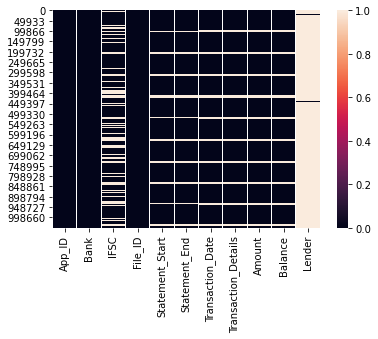

In [13]:
sns.heatmap(df.isnull())

In [14]:
df = df[~df.Transaction_Date.isnull()]

In [15]:
df.isnull().sum()

App_ID                      0
Bank                        0
IFSC                   165467
File_ID                     0
Statement_Start            27
Statement_End              27
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 923848
dtype: int64

In [16]:
df = df[~df.Statement_End.isnull()]

In [17]:
df[~df['Lender'].isnull()]

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
318,60532,kotak,KKBK0007450,425697,2019-06-01,2019-06-30,2019-06-20,IMPSfromFINNOVATIONRef917119818154,8351.00,10626.86,Finnovation Tech Solutions Pvt. Ltd
344,60545,axis,UTIB0002273,425816,2019-07-01,2019-07-31,2019-07-02,ECS/BAJAJ FINANCE LI/405DPFEC140225,-1933.00,11711.32,Bajaj Finance
346,60545,axis,UTIB0002273,425816,2019-07-01,2019-07-31,2019-07-02,ECS/BAJAJ FINANCE LI/405DPFEC140225,-2272.00,7248.32,Bajaj Finance
522,60559,icici,ICIC0002512,425892,2018-12-01,2018-12-31,2018-12-24,ACH/BD-Camden/TIDR537541,-2987.00,5041.88,Camden town technologies
523,60559,icici,ICIC0002512,425892,2018-12-01,2018-12-31,2018-12-24,ECSRTNCHGS211218_SR584774507,-413.00,4628.88,ICICI Bank
...,...,...,...,...,...,...,...,...,...,...,...
1048075,64098,icici,ICIC0000404,458476,2019-08-01,2019-08-31,2019-08-12,MMT/IMPS/922218717662/ZestMoney Bank /CAMDEN T...,1.00,4951.32,Camden town technologies
1048083,64098,icici,ICIC0000404,458476,2019-08-01,2019-08-31,2019-08-13,NEFT-N225190273425814-CAMDEN TOWN TECH PL-NEFT...,47.00,2503.32,Camden town technologies
1048084,64098,icici,ICIC0000404,458476,2019-08-01,2019-08-31,2019-08-13,NEFT-N225190273425428-CAMDEN TOWN TECH PL-NEFT...,53.00,2556.32,Camden town technologies
1048085,64098,icici,ICIC0000404,458476,2019-08-01,2019-08-31,2019-08-13,NEFT-N225190273425830-CAMDEN TOWN TECH PL-NEFT...,66.00,2622.32,Camden town technologies


#### Temporarily Removing Null IFSCs

In [18]:
df.Bank.value_counts()

kotak        314047
hdfc         270504
axis         136643
icici        106411
andhra        63251
bob           12953
rbl           12933
dena           7640
sbi            7136
indusind       1796
dcb            1747
ubi            1459
syndicate      1295
yes             602
idbi            165
equitas          88
corp             40
au                7
Name: Bank, dtype: int64

In [19]:
df[df['IFSC'].isnull()]['Bank'].value_counts()

andhra       63251
axis         55558
kotak        41412
bob           3659
syndicate     1295
idbi           165
equitas         88
au               7
dcb              5
Name: Bank, dtype: int64

    ## No IFSC Codes don't mean invalid : Just not able to Parse it!

#### Handling the Dates!

In [20]:
df.Transaction_Date.apply(lambda x:len(str(x).split('-')[0])).value_counts()


4    938716
7         1
Name: Transaction_Date, dtype: int64

In [21]:
df['Transaction_Year'] = df.Transaction_Date.apply(lambda x:str(x).split('-')[0])
df.Transaction_Year.value_counts()

2019       745945
2018       137172
2020        55534
2017           47
1931            2
1921            2
1929            2
1920            1
2005            1
1806            1
1902            1
1906            1
1901            1
2027            1
+201829         1
1903            1
1926            1
1930            1
2024            1
1904            1
Name: Transaction_Year, dtype: int64

In [22]:
df = df[df['Transaction_Year'].isin(['2019','2018','2020'])]

In [23]:
df.Transaction_Date = pd.to_datetime(df.Transaction_Date)
df.Statement_End = pd.to_datetime(df.Statement_End)
df.Statement_Start = pd.to_datetime(df.Statement_Start)

In [24]:
df.drop('Transaction_Year',axis=1,inplace=True)

In [25]:
## Static Lenders, last updated in 2019 --> Ignore!

df.drop('Lender',axis=1,inplace=True)

In [26]:
import re
df['New_Transaction_Details'] = df.Transaction_Details.transform(lambda X : re.sub(r"[^a-zA-Z/@]+", "~", X))

In [27]:
## '@' in Transaction
special = df.New_Transaction_Details.transform(lambda x:True if '@' in x else False)

In [28]:
df[special].New_Transaction_Details.transform(lambda x:str(x).split('/')[0][:3]).value_counts()

UPI    201334
Upi      4542
GST      1667
REV      1440
CAS       493
        ...  
~@y         1
FAI         1
ATW         1
s~B         1
MBC         1
Name: New_Transaction_Details, Length: 176, dtype: int64

In [29]:
df['New_Transaction_Details'] = df.Transaction_Details.transform(lambda X : re.sub(r"[^a-zA-Z/]+", "~", X))

## Handling Anomalies based on Date!

In [30]:
anomaly_1 = df[df.Transaction_Date<df.Statement_Start]
anomaly_2 = df[df.Transaction_Date>df.Statement_End]

In [31]:
anomalies = pd.concat([anomaly_1,anomaly_2])
anomalies

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,New_Transaction_Details
2740,61661,hdfc,HDFC0004299,437338,2019-04-27,2019-05-26,2019-04-26,POS 512967XXXXXX8027 SRI SAI FOODS POS DEBIT,-40.00,4314.01,POS~XXXXXX~SRI~SAI~FOODS~POS~DEBIT
4806,62255,hdfc,HDFC0000362,442919,2019-06-01,2019-06-30,2019-05-31,ATW-405988XXXXXX7596-S1ACJS04-SUNDARGARHValue ...,-200.00,15259.53,ATW~XXXXXX~S~ACJS~SUNDARGARHValue~Dt~/~/~Ref~
11105,68156,hdfc,HDFC0000381,503579,2019-06-03,2019-07-02,2019-06-02,UPI-PAYTM-PAYTM-UTILITY@PAYTM-PYTM0123456-9153...,-1975.67,23526.33,UPI~PAYTM~PAYTM~UTILITY~PAYTM~PYTM~OID~ONE~
19177,71753,kotak,KKBK0000197,555065,2019-09-01,2019-09-30,2019-07-01,OpeningBalance,1000.00,1000.00,OpeningBalance
19178,71753,kotak,KKBK0000197,555065,2019-09-01,2019-09-30,2019-07-29,Closureproceedscreditedto[2813475532],1000.00,0.00,Closureproceedscreditedto~
...,...,...,...,...,...,...,...,...,...,...,...
1024293,116414,hdfc,HDFC0002729,923176,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,3630.00,180541.25,Credit~Interest~Capitalised~Value~Dt~/~/~
1024294,116414,hdfc,HDFC0002729,923176,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,931.00,100931.00,Credit~Interest~Capitalised~Value~Dt~/~/~
1024396,116452,hdfc,HDFC0001246,923463,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,95.00,2804.01,Credit~Interest~Capitalised~Value~Dt~/~/~
1027956,119612,hdfc,HDFC0002837,939143,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,3.00,18.23,Credit~Interest~Capitalised~Value~Dt~/~/~


## Debits, Credits, Debit Credit Ratio(Nos and Amts), Total Transactions

In [32]:
df[df.Amount>0].shape

(335199, 11)

In [33]:
# df.Amount.apply(lambda x: (x>0)).sum()
debt_cred = df.groupby('App_ID')['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
debt_cred.columns = ['App_ID','Debits','Credits']
df = pd.merge(df,debt_cred)

In [34]:
debit_amount = df[df['Amount']<0].groupby('App_ID')[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
debit_amount.rename(columns = {'Amount':'Overall_Debit_Amount'},inplace=True)
credit_amount = df[df['Amount']>0].groupby('App_ID')[['Amount']].sum().transform(lambda x:abs(x)).reset_index()
credit_amount.rename(columns = {'Amount':'Overall_Credit_Amount'},inplace=True)
df = pd.merge(df,debit_amount,how='left')
df = pd.merge(df,credit_amount,how='left')
df.isnull().sum()

App_ID                          0
Bank                            0
IFSC                       165393
File_ID                         0
Statement_Start                 0
Statement_End                   0
Transaction_Date                0
Transaction_Details             0
Amount                          0
Balance                         0
New_Transaction_Details         0
Debits                          0
Credits                         0
Debit_Amount                 3098
Credit_Amount                1351
dtype: int64

In [35]:
df.Overall_Debit_Amount.fillna(0,inplace=True)
df.Overall_Credit_Amount.fillna(0,inplace=True)

In [36]:
df[df.Overall_Credit_Amount==0]

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,New_Transaction_Details,Debits,Credits,Debit_Amount,Credit_Amount
48162,64614,bob,BARB0ECSTRE,465040,2019-08-01,2019-08-31,2019-08-26,31-07-2019SMS Alert charges for Qtr Sep-19,-17.7,242.96,~SMS~Alert~charges~for~Qtr~Sep~,13,0,20409.9,0.0
48163,64614,bob,BARB0ECSTRE,465038,2019-07-01,2019-07-31,2019-07-02,ATM/CASH/918308025758/XXXXXXXXXXXX6588,-200.0,1236.66,ATM/CASH/~/XXXXXXXXXXXX~,13,0,20409.9,0.0
48164,64614,bob,BARB0ECSTRE,465038,2019-07-01,2019-07-31,2019-07-15,PRCR/VODAFONE/Mumbai,-65.0,1171.66,PRCR/VODAFONE/Mumbai,13,0,20409.9,0.0
48165,64614,bob,BARB0ECSTRE,465038,2019-07-01,2019-07-31,2019-07-17,ATM/CASH/919812025244/XXXXXXXXXXXX6588,-1000.0,171.66,ATM/CASH/~/XXXXXXXXXXXX~,13,0,20409.9,0.0
48166,64614,bob,BARB0ECSTRE,465043,2019-06-01,2019-06-30,2019-06-10,ATM/CASH/916121017784/XXXXXXXXXXXX6588,-5000.0,15152.00,ATM/CASH/~/XXXXXXXXXXXX~,13,0,20409.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938060,115110,sbi,SBIN0010338,917343,2019-04-04,2019-05-03,2019-05-03,99922 WDL TFR INTERNET BANKING INB Paytm Payme...,-1000.0,1848.88,~WDL~TFR~INTERNET~BANKING~INB~Paytm~Payments~B...,18,0,92609.0,0.0
938061,115110,sbi,SBIN0010338,917343,2019-04-04,2019-05-03,2019-05-03,99922 WDL TFR INTERNET BANKING INB Paytm Payme...,-1000.0,848.88,~WDL~TFR~INTERNET~BANKING~INB~Paytm~Payments~B...,18,0,92609.0,0.0
938062,72860,kotak,KKBK0000191,924867,2019-05-01,2019-05-31,2019-05-01,OPENINGBALANCE...,0.0,0.00,OPENINGBALANCE~,0,0,0.0,0.0
938063,116685,kotak,KKBK0004606,924982,2019-05-01,2019-05-31,2019-05-01,OPENINGBALANCE...,0.0,0.00,OPENINGBALANCE~,0,0,0.0,0.0


In [37]:
df.Bank.value_counts()

kotak        314046
hdfc         270504
axis         136643
icici        106411
andhra        63251
bob           12953
rbl           12933
dena           7640
sbi            7118
indusind       1796
dcb            1747
ubi            1459
syndicate      1248
yes             602
idbi            165
equitas          88
corp             40
au                7
Name: Bank, dtype: int64

In [38]:
anomalies.Transaction_Details.unique()

array(['POS 512967XXXXXX8027 SRI SAI FOODS POS DEBIT',
       'ATW-405988XXXXXX7596-S1ACJS04-SUNDARGARHValue Dt 01/06/2019 Ref 601',
       'UPI-PAYTM-PAYTM-UTILITY@PAYTM-PYTM0123456-915346761477-OID8404131820@ONE9',
       'OpeningBalance', 'Closureproceedscreditedto[2813475532]',
       'UPI-KALPESH BHAUSAHEB BA-9595206306@YBL-RATN0000000-920569814282-PAYMENT FROM PHONE',
       'LUUX254IAZ7KNNGS/PAYUMANAPPURAMFINANC',
       'UPI-BRIJ INDIAN OIL-Q00109106@YBL-YESB0YBLUPI-921666053554-PAYMENT FROM PHONE',
       'POS 416021XXXXXX4022 WHYTEFARMS POS DEBIT Value Dt 01/11/2018 Ref 830440232862',
       '0', 'ATW-416021XXXXXX5267-P3ENHY97-HYDERABAD',
       'UPI-0103SL00IPAY-PAYTM@ICICI-901823812035-OID7106753728@ONE97COMMUNICATIONSLIMITED',
       'UPI-AHMED KHAN KHUTUB KH-AHMEDK1071986@OKSBI-SBIN0017554-913423750415-UPI',
       'UPI-SHAIKH SABUR AHMED T-8484044474@UPI-HDFC0000113-913423265369-SS',
       'POS 436303XXXXXX8801 PAYTM WEB POS DEBITValue Dt 01/11/2018 Ref 830410215738',
 

In [39]:
anomalies

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,New_Transaction_Details
2740,61661,hdfc,HDFC0004299,437338,2019-04-27,2019-05-26,2019-04-26,POS 512967XXXXXX8027 SRI SAI FOODS POS DEBIT,-40.00,4314.01,POS~XXXXXX~SRI~SAI~FOODS~POS~DEBIT
4806,62255,hdfc,HDFC0000362,442919,2019-06-01,2019-06-30,2019-05-31,ATW-405988XXXXXX7596-S1ACJS04-SUNDARGARHValue ...,-200.00,15259.53,ATW~XXXXXX~S~ACJS~SUNDARGARHValue~Dt~/~/~Ref~
11105,68156,hdfc,HDFC0000381,503579,2019-06-03,2019-07-02,2019-06-02,UPI-PAYTM-PAYTM-UTILITY@PAYTM-PYTM0123456-9153...,-1975.67,23526.33,UPI~PAYTM~PAYTM~UTILITY~PAYTM~PYTM~OID~ONE~
19177,71753,kotak,KKBK0000197,555065,2019-09-01,2019-09-30,2019-07-01,OpeningBalance,1000.00,1000.00,OpeningBalance
19178,71753,kotak,KKBK0000197,555065,2019-09-01,2019-09-30,2019-07-29,Closureproceedscreditedto[2813475532],1000.00,0.00,Closureproceedscreditedto~
...,...,...,...,...,...,...,...,...,...,...,...
1024293,116414,hdfc,HDFC0002729,923176,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,3630.00,180541.25,Credit~Interest~Capitalised~Value~Dt~/~/~
1024294,116414,hdfc,HDFC0002729,923176,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,931.00,100931.00,Credit~Interest~Capitalised~Value~Dt~/~/~
1024396,116452,hdfc,HDFC0001246,923463,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,95.00,2804.01,Credit~Interest~Capitalised~Value~Dt~/~/~
1027956,119612,hdfc,HDFC0002837,939143,2019-12-01,2019-12-31,2020-01-01,Credit Interest Capitalised Value Dt 31/12/2019,3.00,18.23,Credit~Interest~Capitalised~Value~Dt~/~/~


In [40]:
temp = anomalies.groupby('App_ID')[['File_ID']].count().reset_index()
temp.columns = ['App_ID','Anomalies']
df = pd.merge(df,temp,how='left')
df.isnull().sum()

App_ID                          0
Bank                            0
IFSC                       165393
File_ID                         0
Statement_Start                 0
Statement_End                   0
Transaction_Date                0
Transaction_Details             0
Amount                          0
Balance                         0
New_Transaction_Details         0
Debits                          0
Credits                         0
Debit_Amount                    0
Credit_Amount                   0
Anomalies                  827070
dtype: int64

In [41]:
df.Anomalies.fillna(0,inplace=True)

In [42]:
df.drop('IFSC',axis=1,inplace=True)

In [ ]:
df.groupby(['App_ID','Bank'])